In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/lung-cancer-data/lung cancer survey.csv


In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("samuelotiattakorah/lung-cancer-data")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/lung-cancer-data


In [4]:
df = pd.read_csv(path + "/lung cancer survey.csv")

#Restructing data values so 1="Yes" and 0="No"
df['LUNG_CANCER'] = df['LUNG_CANCER'].replace({'YES': 2, 'NO': 1})
df['GENDER'] = df['GENDER'].replace({'M': 2, 'F': 1})
df = df.applymap(lambda y: 0 if y == 1 else y)
df = df.applymap(lambda x: 1 if x == 2 else x)

df.head()

<ipython-input-4-0e3687b8d852>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['LUNG_CANCER'] = df['LUNG_CANCER'].replace({'YES': 2, 'NO': 1})
<ipython-input-4-0e3687b8d852>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['GENDER'] = df['GENDER'].replace({'M': 2, 'F': 1})
<ipython-input-4-0e3687b8d852>:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda y: 0 if y == 1 else y)
<ipython-input-4-0e3687b8d852>:7: FutureWarning: DataFrame.applymap has been deprecated. U

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


In [24]:
# Central Tendency Measures
mean = df.mean()
median = df.median()
mode = df.mode()
midrange = (df.min() + df.max()) / 2
range_ = df.max() - df.min()
minimum = df.min()
Q1 = df.quantile(0.25)
Q2 = df.quantile(0.50)
Q3 = df.quantile(0.75)
maximum = df.max()
IQR = Q3 - Q1
variance = df.var()
std_dev = df.std()

print("\nCentral Tendency Measures:")
print("\nMean:", mean)
print("\nMedian:", median)
print("\nMode:", mode)
print("\nMidrange:", midrange)
print("\nRange:\n", range_)
print("\nMinimum:\n", minimum)
print("\nQ1 (25th percentile):\n", Q1)
print("\nQ2 (Median/50th percentile):\n", Q2)
print("\nQ3 (75th percentile):\n", Q3)
print("\nMaximum:\n", maximum)
print("\nInterquartile Range (IQR):\n", IQR)
print("\nVariance:\n", variance)
print("\nStandard Deviation:\n", std_dev)


Central Tendency Measures:

Mean: GENDER                    0.524272
AGE                      62.673139
SMOKING                   0.563107
YELLOW_FINGERS            0.569579
ANXIETY                   0.498382
PEER_PRESSURE             0.501618
CHRONIC DISEASE           0.504854
FATIGUE                   0.673139
ALLERGY                   0.556634
WHEEZING                  0.556634
ALCOHOL CONSUMING         0.556634
COUGHING                  0.579288
SHORTNESS OF BREATH       0.640777
SWALLOWING DIFFICULTY     0.469256
CHEST PAIN                0.556634
LUNG_CANCER               0.873786
dtype: float64

Median: GENDER                    1.0
AGE                      62.0
SMOKING                   1.0
YELLOW_FINGERS            1.0
ANXIETY                   0.0
PEER_PRESSURE             1.0
CHRONIC DISEASE           1.0
FATIGUE                   1.0
ALLERGY                   1.0
WHEEZING                  1.0
ALCOHOL CONSUMING         1.0
COUGHING                  1.0
SHORTNESS OF BREATH  

In [5]:
#Skewness
skewness = df.skew()
print("Skewness: ", skewness)

Skewness:  GENDER                  -0.097677
AGE                     -0.395086
SMOKING                 -0.255705
YELLOW_FINGERS          -0.282425
ANXIETY                  0.006504
PEER_PRESSURE           -0.006504
CHRONIC DISEASE         -0.019513
FATIGUE                 -0.741836
ALLERGY                 -0.229118
WHEEZING                -0.229118
ALCOHOL CONSUMING       -0.229118
COUGHING                -0.322786
SHORTNESS OF BREATH     -0.589714
SWALLOWING DIFFICULTY    0.123812
CHEST PAIN              -0.229118
LUNG_CANCER             -2.262112
dtype: float64


In [23]:
#Class Imbalance
class_distribution = df['LUNG_CANCER'].value_counts()
print("\nClass Distribution:\n", class_distribution)

imbalance_ratio = class_distribution[1]/class_distribution[0]
print("\nImbalance Ratio:",imbalance_ratio)


Class Distribution:
 LUNG_CANCER
1    270
0     39
Name: count, dtype: int64

Imbalance Ratio: 6.923076923076923


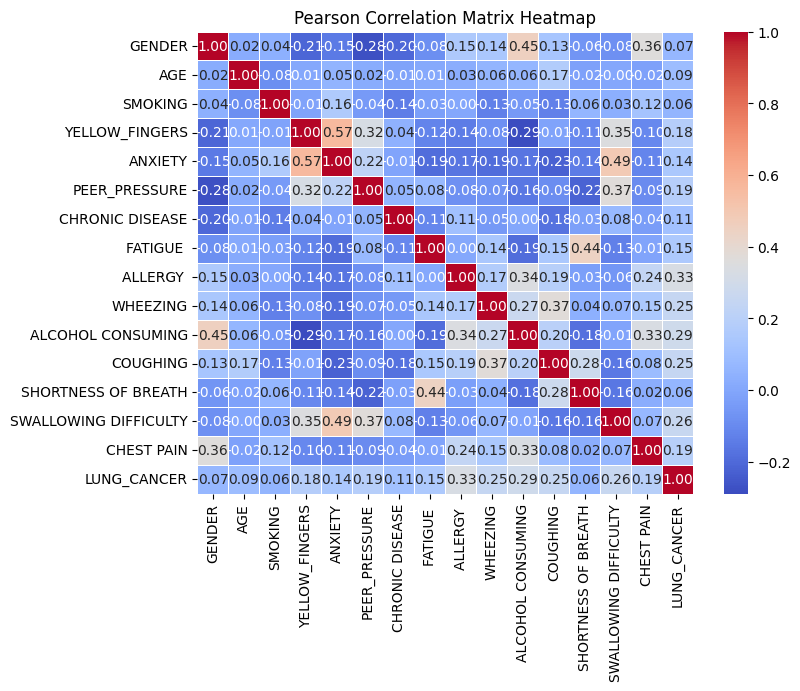

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Pearson Correlation Matrix Heatmap')
plt.show()

In [13]:
from scipy.stats import chi2_contingency

bins = [20, 30, 40, 50, 60, 70, 80]
labels = ['20-30', '30-40', '40-50', '50-60', '60-70', '70-80']
df['AGE'] = pd.cut(df['AGE'], bins=bins, labels=labels, right=False)
contingency_table = pd.crosstab(df['AGE'], df['LUNG_CANCER'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Contingency Table:")
print(contingency_table)
print("\nChi2 Stat:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("\nExpected Frequencies:")
print(expected)

Contingency Table:
LUNG_CANCER   0    1
AGE                 
20-30         1    0
30-40         0    2
40-50         2   10
50-60        13   78
60-70        20  114
70-80         2   64

Chi2 Stat: 13.949802182200674
P-value: 0.01593144305784485
Degrees of Freedom: 5

Expected Frequencies:
[[  0.12418301   0.87581699]
 [  0.24836601   1.75163399]
 [  1.49019608  10.50980392]
 [ 11.30065359  79.69934641]
 [ 16.64052288 117.35947712]
 [  8.19607843  57.80392157]]


In [15]:
contingency_table2 = pd.crosstab(df['SMOKING'], df['LUNG_CANCER'])
chi2, p, dof, expected = chi2_contingency(contingency_table2)

print("Contingency Table:")
print(contingency_table2)
print("\nChi2 Stat:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("\nExpected Frequencies:")
print(expected)

Contingency Table:
LUNG_CANCER   0    1
SMOKING             
0            20  115
1            19  155

Chi2 Stat: 0.7225127713920805
P-value: 0.39532090950779786
Degrees of Freedom: 1

Expected Frequencies:
[[ 17.03883495 117.96116505]
 [ 21.96116505 152.03883495]]


In [18]:
contingency_table3 = pd.crosstab(df['ALCOHOL CONSUMING'], df['LUNG_CANCER'])
chi2, p, dof, expected = chi2_contingency(contingency_table3)

print("Contingency Table:")
print(contingency_table3)
print("\nChi2 Stat:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("\nExpected Frequencies:")
print(expected)

Contingency Table:
LUNG_CANCER         0    1
ALCOHOL CONSUMING         
0                  32  105
1                   7  165

Chi2 Stat: 24.00540608990681
P-value: 9.60655896246563e-07
Degrees of Freedom: 1

Expected Frequencies:
[[ 17.29126214 119.70873786]
 [ 21.70873786 150.29126214]]
